In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.applications.resnet import ResNet50, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import sklearn.metrics as metrics
import pandas as pd

In [3]:
df=pd.read_csv("/content/drive/MyDrive/PROJECTS/Imageclassification/data-analytics-spring-2023-image-classification-3/da_sp23_test_label_image.csv")

In [4]:

df

,Id,Class
0,test_adult_1,1
1,test_adult_2,1
2,test_adult_3,1
3,test_adult_4,1
4,test_adult_5,1
...,...,...
475,test_vessel_26,16
476,test_vessel_27,16
477,test_vessel_28,16
478,test_vessel_29,16


In [5]:
train_dir = '/content/drive/MyDrive/PROJECTS/Imageclassification/data-analytics-spring-2023-image-classification-3/Training Image sp 23/Training Image sp 23'
test_dir = '/content/drive/MyDrive/PROJECTS/Imageclassification/data-analytics-spring-2023-image-classification-3/Test Image sp 23/Test Image sp 23'
img_size = (224, 224)

In [6]:
import pathlib
file_path = train_dir
data_dir = pathlib.Path(file_path)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['Adult' 'Airplane' 'Alpaca' 'Bird' 'Bus' 'Car' 'Cat' 'Child' 'Elephant'
 'Flower' 'Giraffe' 'Horse' 'Monkey' 'Panda' 'Reptile' 'Vessel']


In [7]:
import random
import matplotlib.pyplot as plt
import os
plt.figure(figsize=(20, 20)) 
for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    random_class = random.randint(0, 15)
    folder_path = file_path + '/' + class_names[random_class]
    random_image_path = folder_path + '/' + (random.sample(os.listdir(folder_path), 1)[0])
    image = plt.imread(random_image_path)
    plt.axis('off')
    plt.title(class_names[random_class], fontsize = 15, fontweight = 'bold')
    plt.imshow(image)

Output hidden; open in https://colab.research.google.com to view.

In [8]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=64,
    class_mode='categorical',
    shuffle=False)
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=64,
    class_mode='categorical',
    shuffle=False)

Found 1838 images belonging to 16 classes.
Found 480 images belonging to 16 classes.


In [10]:
num_classes = len(train_generator.class_indices) 
print(num_classes)

16


In [11]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
train_features = base_model.predict(train_generator, verbose=1)
train_features = np.reshape(train_features, (train_features.shape[0], -1))
train_labels = train_generator.classes

 9/29 [========>.....................] - ETA: 14:21

In [ ]:
np.save('/content/drive/MyDrive/PROJECTS/Imageclassification/train_features.npy', train_features)
np.save('/content/drive/MyDrive/PROJECTS/Imageclassification/train_labels.npy', train_labels)

In [ ]:
test_features = base_model.predict(test_generator, verbose=1)
test_features = np.reshape(test_features, (test_features.shape[0], -1))
test_labels = test_generator.classes

8/8 [==============================] - 114s 16s/step


In [ ]:
np.save('/content/drive/MyDrive/PROJECTS/Imageclassification/test_features.npy', test_features)
np.save('/content/drive/MyDrive/PROJECTS/Imageclassification/test_labels.npy', test_labels)

In [12]:
import numpy as np
train_features = np.load('/content/drive/MyDrive/PROJECTS/Imageclassification/train_features.npy')
train_labels = np.load('/content/drive/MyDrive/PROJECTS/Imageclassification/train_labels.npy')
test_features = np.load('/content/drive/MyDrive/PROJECTS/Imageclassification/test_features.npy')
test_labels = np.load('/content/drive/MyDrive/PROJECTS/Imageclassification/test_labels.npy')


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import sklearn.metrics as metrics
from sklearn.svm import SVC

In [14]:
clf = LogisticRegression(max_iter=100000)
clf.fit(train_features, train_labels)
y_pred_logistic = clf.predict(test_features)

print("Accuracy:", (metrics.accuracy_score(test_labels, y_pred_logistic))*100)
print('Confusion Matrix:\n', confusion_matrix(test_labels, y_pred_logistic))
print('\nClassification Report:\n', classification_report(test_labels, y_pred_logistic, target_names=list(train_generator.class_indices.keys())))

Accuracy: 96.66666666666667
Confusion Matrix:
 [[24  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0 29  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 29  0  0  0  0  1  0]
 [ 1  0  0  0  0  0  0  0  0  0 29  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  0  0 28  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0 29  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 30]]

Classification Report:
               precision    recall  f1-score   support

       Adult       0.83      0.80      0.81        30
  

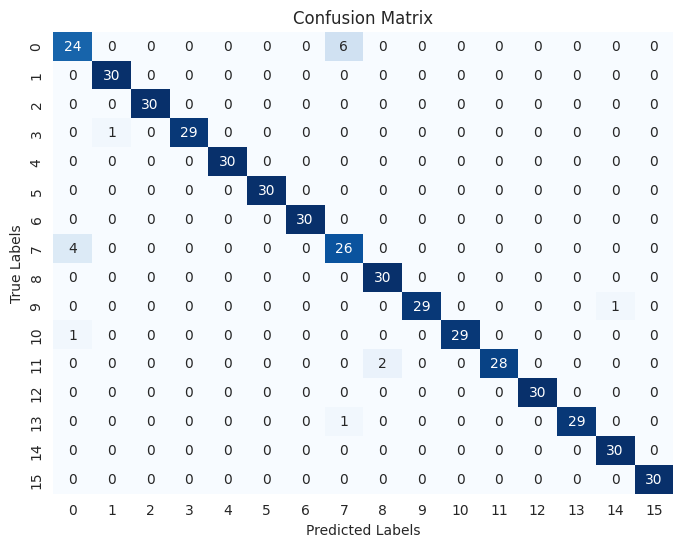


Classification Report:
               precision    recall  f1-score   support

       Adult       0.83      0.80      0.81        30
    Airplane       0.97      1.00      0.98        30
      Alpaca       1.00      1.00      1.00        30
        Bird       1.00      0.97      0.98        30
         Bus       1.00      1.00      1.00        30
         Car       1.00      1.00      1.00        30
         Cat       1.00      1.00      1.00        30
       Child       0.79      0.87      0.83        30
    Elephant       0.94      1.00      0.97        30
      Flower       1.00      0.97      0.98        30
     Giraffe       1.00      0.97      0.98        30
       Horse       1.00      0.93      0.97        30
      Monkey       1.00      1.00      1.00        30
       Panda       1.00      0.97      0.98        30
     Reptile       0.97      1.00      0.98        30
      Vessel       1.00      1.00      1.00        30

    accuracy                           0.97       480
 

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(test_labels, y_pred_logistic)

sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the classification report
print('\nClassification Report:\n', classification_report(test_labels, y_pred_logistic, target_names=list(train_generator.class_indices.keys())))

# Print the accuracy score
print("Accuracy:", (metrics.accuracy_score(test_labels, y_pred_logistic))*100)


In [ ]:
print(y_pred_logistic)

[ 0  0  7  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  7  7  0  0  0  7
  7  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  1  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  0  7  0
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  0  7  7  7  0  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  9  9  9  9  9 14  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10  0 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10

In [ ]:
LogisticRegression = pd.DataFrame(y_pred_logistic, columns=['LogisticRegression'])

In [ ]:
LogisticRegression['LogisticRegression']+=1

In [ ]:
LogisticRegression

,LogisticRegression
0,1
1,1
2,8
3,1
4,1
...,...
475,16
476,16
477,16
478,16


In [ ]:
prediction_df = pd.concat([df, LogisticRegression], axis=1)
prediction_df.to_csv('prediction_df.csv', index=False)

In [ ]:
prediction_df

,Id,Class,LogisticRegression
0,test_adult_1,1,1
1,test_adult_2,1,1
2,test_adult_3,1,8
3,test_adult_4,1,1
4,test_adult_5,1,1
...,...,...,...
475,test_vessel_26,16,16
476,test_vessel_27,16,16
477,test_vessel_28,16,16
478,test_vessel_29,16,16


In [16]:
svm = SVC()
svm.fit(train_features,train_labels)
y_pred_svm = svm.predict(test_features)
print("Accuracy:", (metrics.accuracy_score(test_labels, y_pred_svm))*100)
print('Confusion Matrix:\n', confusion_matrix(test_labels, y_pred_svm))
print('\nClassification Report:\n', classification_report(test_labels, y_pred_svm, target_names=list(train_generator.class_indices.keys())))


Accuracy: 96.04166666666667
Confusion Matrix:
 [[26  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 29  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0 29  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0 27  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 28  0  0  0  0  2  0]
 [ 0  0  2  1  0  0  0  0  0  0 27  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  1  0  0 27  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0 29  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0 29  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 30]]

Classification Report:
               precision    recall  f1-score   support

       Adult       0.84      0.87      0.85        30
  

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the confusion matrix
conf_matrix = confusion_matrix(test_labels, y_pred_svm)

# Set the figure size
plt.figure(figsize=(8,6))

# Plot the confusion matrix
sns.heatmap(conf_matrix, cmap="Blues", annot=True, fmt='g', xticklabels=list(train_generator.class_indices.keys()), yticklabels=list(train_generator.class_indices.keys()))

# Set the axis labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [ ]:
print(y_pred_svm)


[ 0  0  7  0  0  7  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  7
  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  3  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  1  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  7  7  0  0  7  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  0  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  9  9  9  9  9 14  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9 14 10 10 10 10 10 10 10  2  2 10 10 10
 10 10 10 10 10 10 10 10  3 10 10 10 10 10 10 10 10

In [ ]:
SVM = pd.DataFrame(y_pred_svm, columns=['SVM'])

In [ ]:
SVM['SVM']+=1

In [ ]:
prediction_df = pd.concat([prediction_df,SVM], axis=1)
prediction_df.to_csv('prediction_df.csv', index=False)

In [ ]:
prediction_df

,Id,Class,LogisticRegression,SVM
0,test_adult_1,1,1,1
1,test_adult_2,1,1,1
2,test_adult_3,1,8,8
3,test_adult_4,1,1,1
4,test_adult_5,1,1,1
...,...,...,...,...
475,test_vessel_26,16,16,16
476,test_vessel_27,16,16,16
477,test_vessel_28,16,16,16
478,test_vessel_29,16,16,16


In [ ]:
import xgboost as xgb
clf = xgb.XGBClassifier()
clf.fit(train_features,train_labels)
y_pred_XG = clf.predict(test_features)
print("Accuracy:", (metrics.accuracy_score(test_labels, y_pred_XG))*100)
print('Confusion Matrix:\n', confusion_matrix(test_labels, y_pred_XG))
print('\nClassification Report:\n', classification_report(test_labels, y_pred_XG, target_names=list(train_generator.class_indices.keys())))

In [ ]:
print(y_pred_XG)

In [ ]:
XG = pd.DataFrame(y_pred_XG, columns=['XG'])

In [ ]:
XG['XG']+=1

In [ ]:
prediction_df = pd.concat([prediction_df,XG], axis=1)
prediction_df.to_csv('prediction_df.csv', index=False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(train_features,train_labels)
y_pred = clf.predict(test_features)
print("Accuracy:", (metrics.accuracy_score(test_labels, y_pred))*100)
print('Confusion Matrix:\n', confusion_matrix(test_labels, y_pred))
print('\nClassification Report:\n', classification_report(test_labels, y_pred, target_names=list(train_generator.class_indices.keys())))

Random Forest Classifier:
Accuracy: 92.70833333333334
Confusion Matrix:
 [[23  0  0  0  0  0  1  6  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0  1  0  1  1  0  0  0  0]
 [ 0  0  0 27  0  0  0  0  0  0  0  0  0  0  2  1]
 [ 0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  3 26  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0 28  0  0  0  0  1  0]
 [ 0  0  3  0  0  0  0  0  0  0 27  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  2  0  0 27  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 29  1  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  1 28  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 30]]

Classification Report:
               precision    recall  f1-score   support

       Adult       0.77      0

In [ ]:
print(y_pred)

In [ ]:
RFC = pd.DataFrame(y_pred, columns=['RFC'])

In [ ]:
RFC['RFC']+=1

In [ ]:
prediction_df = pd.concat([prediction_df,RFC], axis=1)
prediction_df.to_csv('/content/drive/MyDrive/PROJECTS/Imageclassification/prediction_df.csv', index=False)